# PRCP-1016-Heart Disease Prediction

## Heart Disease Prediction Using Machine Learning Algorithm

### Scenario:

In this project, we will be analyzing our dataset is from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.Preventing heart disease is important. Good data-driven systems for predicting heart disease can improve the entire research and prevention process, making sure that more people can live healthy lives.

### Problem Statement

- Prepare a complete data analysis report on the given data.

- Create a model predicting potential Heart Diseases in people using
Machine Learning algorithms.

- Suggestions to the Hospital to awake the predictions of heart diseases
prevent life threats.

# Importing Libreries 

In [163]:
# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,f1_score,recall_score,precision_score
from sklearn.metrics import confusion_matrix as cm
import warnings
warnings.filterwarnings('ignore')

## Importing dataset
1.Since data is in form of csv file we have to use pandas read_csv to load the data.

2.After loading it is important to check the complete information of data as it can indicate many of the hidden infomation such as null values in a column or a row.

3.Check whether any null values are there or not. if it is present then following can be done,

A.Imputing data using Imputation method in sklearn

B.Filling NaN values with mean, median and mode 

4.Describe data --> which can give statistical analysis

In [164]:
df=pd.read_csv(r"values1.csv")
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


## Dataset
- There are 14 columns in the dataset, where the patient_id column is a unique and
random identifier. The remaining 13 features are described in the section below.

**1. Slope_of_peak_exercise_st_segment (type: int):** 
- The slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart

**2. thal (type: categorical):** 
- Results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect 

**3. resting_blood_pressure (type: int):** 
- Resting blood pressure
    
**4. chest_pain_type (type: int):**
- chest pain type (4 values)
    
**5. num_major_vessels (type: int):**
- number of major vessels (0-3) colored by flourosopy

**6. fasting_blood_sugar_gt_120_mg_per_dl (type: binary):**
- fasting blood sugar &gt; 120 mg/dl

**7. resting_ekg_results (type: int):**
- resting electrocardiographic results (values 0,1,2)
    
**8. serum_cholesterol_mg_per_dl (type: int):**
- serum cholestoral in mg/dl
    
**9. oldpeak_eq_st_depression (type: float):**
- oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

**10. sex (type: binary):**
- 0: female, 1: male
            
**11. age (type: int):**
- age in years
    
**12. max_heart_rate_achieved (type: int):**
- maximum heart rate achieved (beats per minute)
    
**13. exercise_induced_angina (type: binary):**
- exercise-induced chest pain (0: False, 1: True)

**14- heart_disease_present (type: binary):**
-  heart_disease_present (0: False, 1: True)

In [165]:
# to drop the patient_id column from the dataset
df=df.drop('patient_id',axis=1)
df

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [166]:
df.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [167]:
df.tail()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


## Exploratory Data Analysis(EDA) 

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

In [169]:
df.shape

(180, 14)

In [170]:
# Checking yhe null values
df.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [171]:
df.thal.unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [172]:
# this will replace 'normal' with 1 , 'reversible_defect' with 2 and 'fixed_defect' with 3
df.thal=df.thal.replace({'normal':1, 'reversible_defect':2, 'fixed_defect':3})
df.thal

0      1
1      1
2      1
3      2
4      2
      ..
175    2
176    1
177    2
178    1
179    1
Name: thal, Length: 180, dtype: int64

The code you’ve written is replacing specific string values in the ‘thal’ column of the DataFrame df with corresponding numerical values. Specifically, it replaces ‘normal’ with 1, ‘reversible_defect’ with 2, and ‘fixed_defect’ with 3. This is typically done to convert categorical data into a numerical format that can be used for further analysis or machine learning models.

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    int64  
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

In [174]:
df.describe()
# all the columns are integers type

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,1.500000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,0.583765,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [175]:
df.size

2520

In [176]:
# Looking at the unique values of heart_diease_present
df.heart_disease_present.unique()

array([0, 1], dtype=int64)

# Data Visualization

Data visualization helps analysts better understand and analyze complex datasets by presenting information in an easily digestible format.
It aids in identifying outliers, trends, and patterns that might be missed through other forms of analysis.

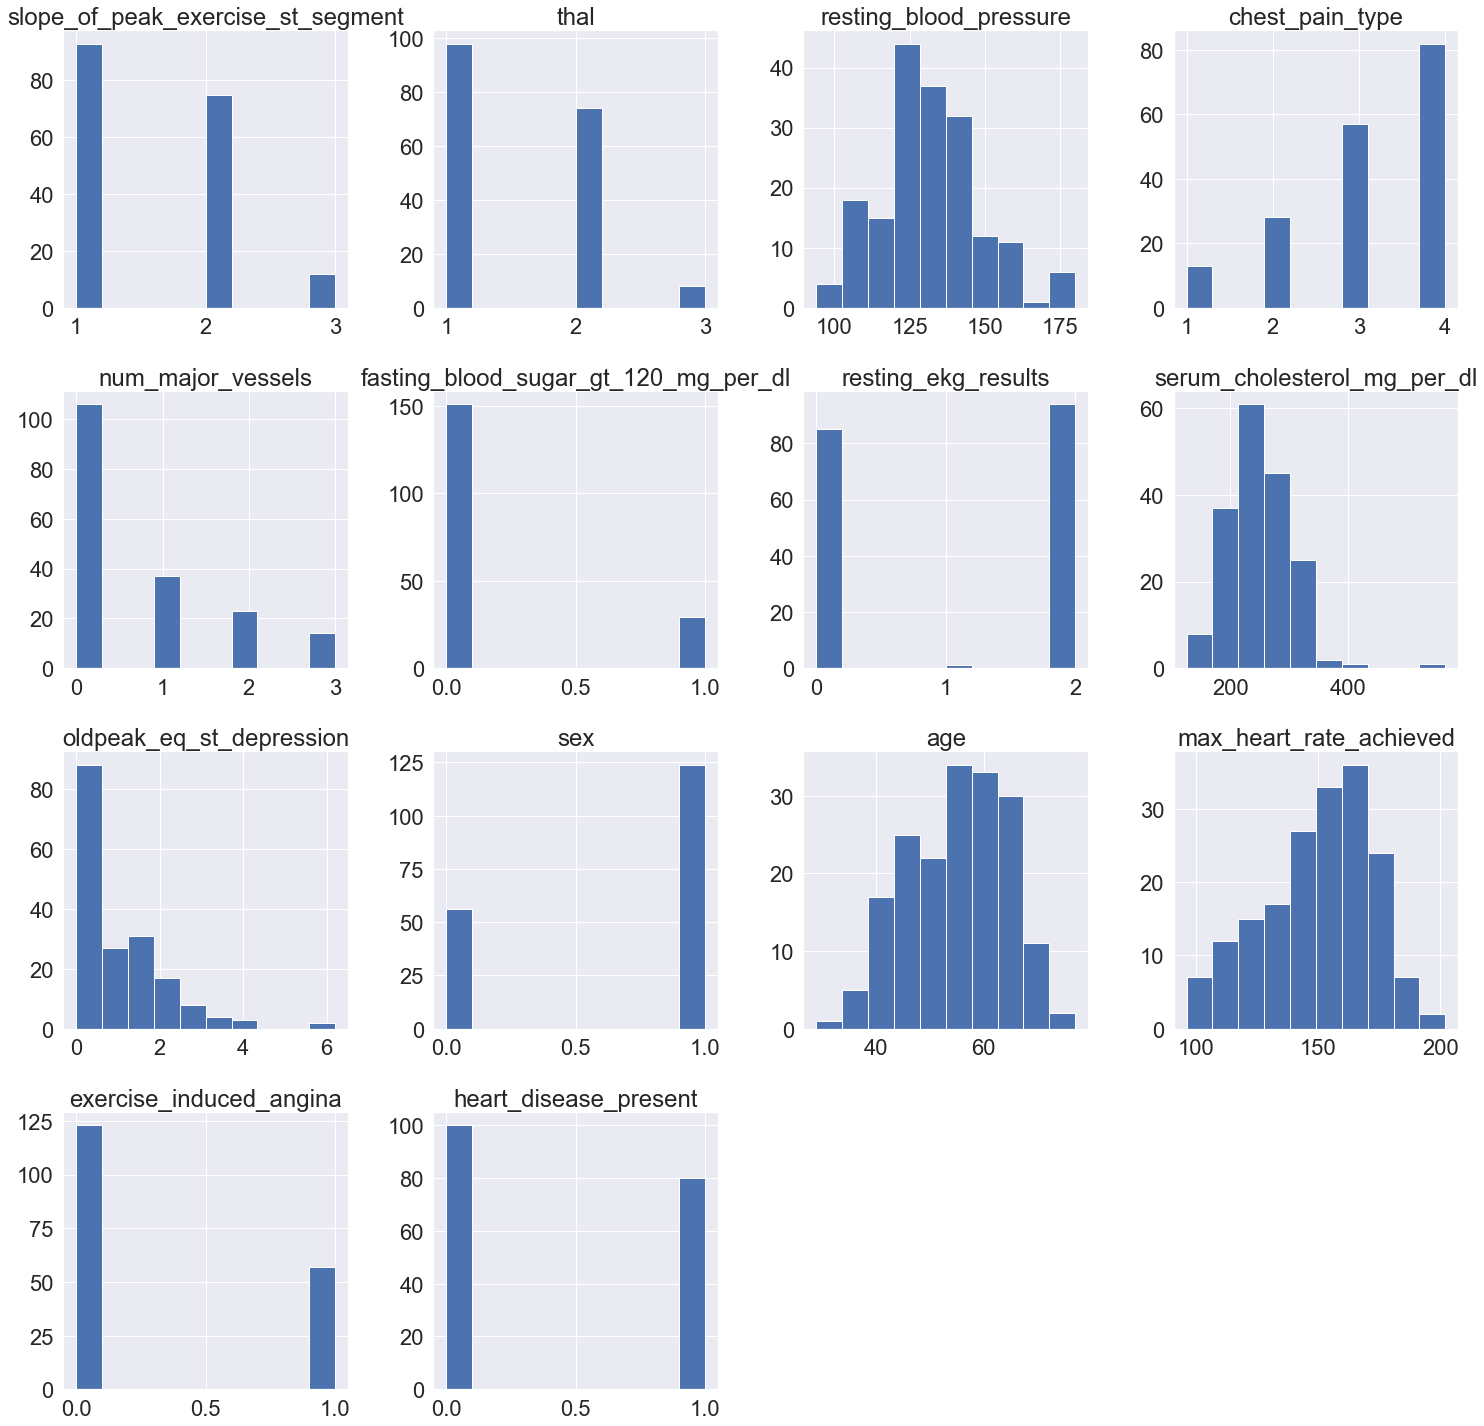

In [177]:
sns.set(font_scale=2)
df.hist(figsize=(25,25))
plt.show()

Inference : The provided code snippet generates histograms for all numerical columns in a dataframe. The histograms are displayed with a larger figure size and increased font scale for better readability. This visualization can help identify the distribution, skewness, and presence of outliers in the data.

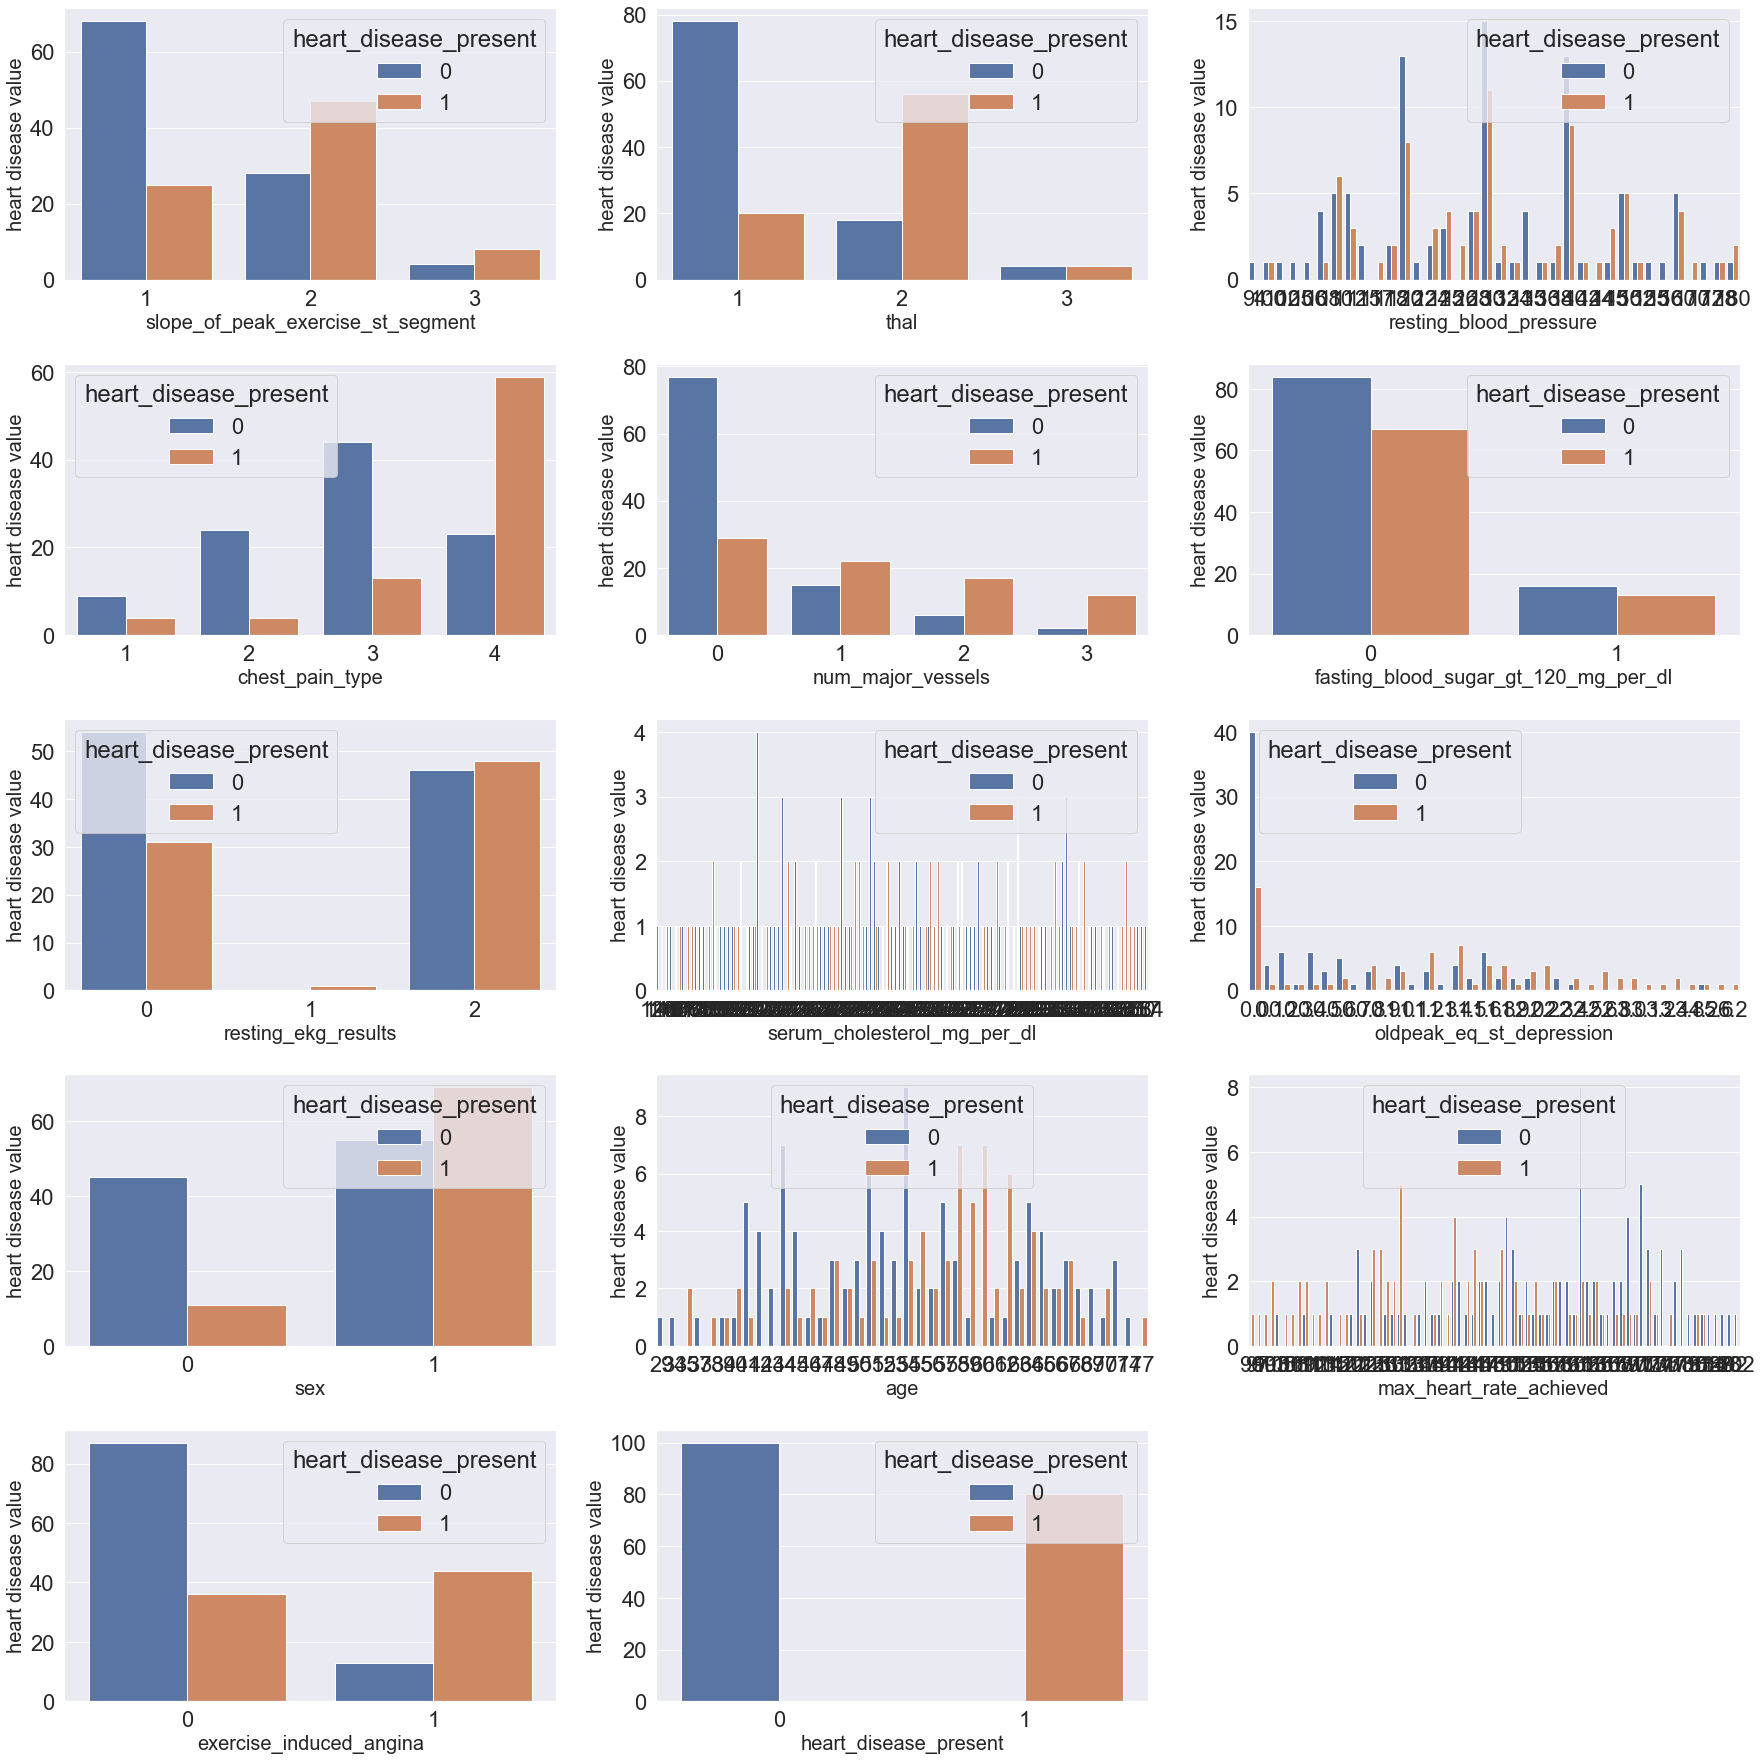

In [178]:
plt.figure(figsize=(25,25), facecolor='white')
plotnum=1
for column in df:
    ax=plt.subplot(5,3,plotnum)
    sns.countplot(x=df[column],hue=df['heart_disease_present'])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('heart disease value',fontsize=20)
    plotnum+=1
plt.tight_layout()

Inference : The provided code snippet creates a grid of count plots for each column in the dataframe df. These plots show the frequency distribution of values in each column, with separate bars for individuals with and without heart disease. By examining these plots, we can gain insights into how different features relate to the presence of heart disease in the dataset.

In [179]:
df.heart_disease_present.value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

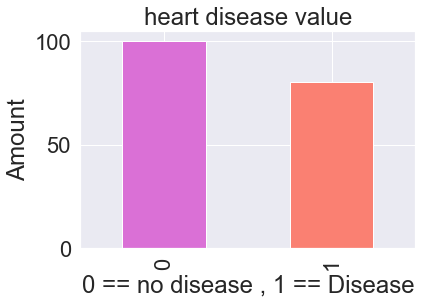

In [180]:
# Plotting a bar chart for disease or no disease vs amount
df.heart_disease_present.value_counts().plot(kind = 'bar', color = ['orchid', 'salmon'])
plt.title("heart disease value")
plt.xlabel("0 == no disease , 1 == Disease")
plt.ylabel("Amount")
plt.show()

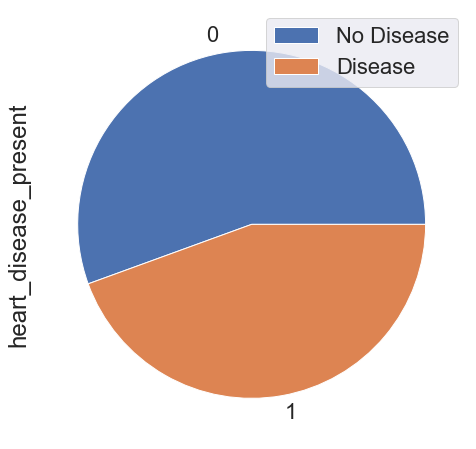

In [181]:
df.heart_disease_present.value_counts().plot(kind = 'pie',figsize = (10, 8))
plt.legend(["No Disease","Disease"])
plt.ylabel("heart_disease_present")
plt.show()

The provided code snippet generates a pie chart to visualize the distribution of heart disease presence within a dataset. The chart differentiates between individuals with and without heart disease, which could be useful for understanding the prevalence of the condition in the studied population.

In [182]:
df.sex.value_counts()

1    124
0     56
Name: sex, dtype: int64

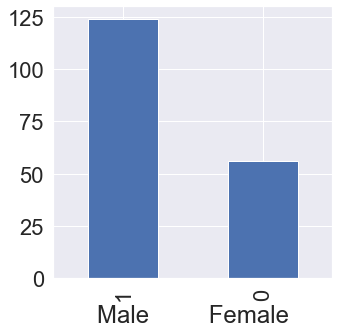

In [183]:
df.sex.value_counts().plot(kind = 'bar', figsize = (5, 5))
plt.xlabel("Male         Female")
plt.show()

This code is creating a bar plot for the ‘sex’ column in the DataFrame df using Python’s matplotlib and pandas libraries. The value_counts() function is used to count the number of occurrences of each unique value in the ‘sex’ column. These counts are then plotted as a bar plot with the size of the figure set to 5x5. The x-axis is labeled as “Male Female”. The plt.show() function is used to display the plot.

<AxesSubplot:xlabel='heart_disease_present', ylabel='count'>

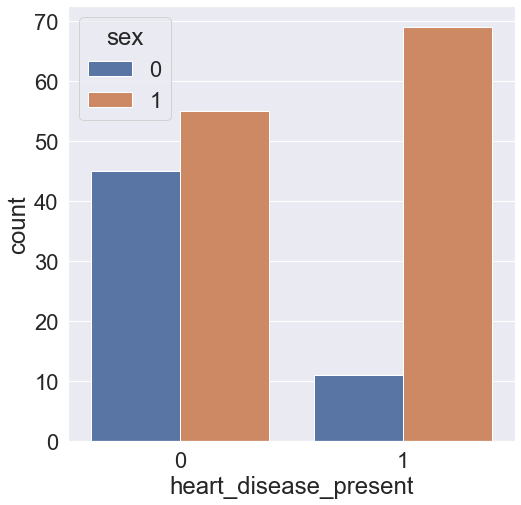

In [184]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'heart_disease_present', data = df, hue = 'sex')

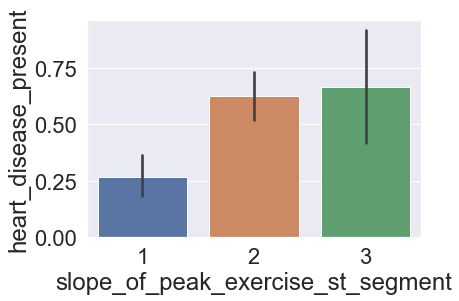

In [185]:
# to create a simple vertical bar plot
sns.barplot(x="slope_of_peak_exercise_st_segment", y="heart_disease_present", data=df)
plt.show()

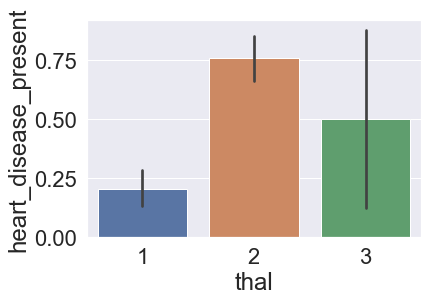

In [186]:
sns.barplot(x="thal", y="heart_disease_present", data=df)
plt.show()

<AxesSubplot:xlabel='sex', ylabel='age'>

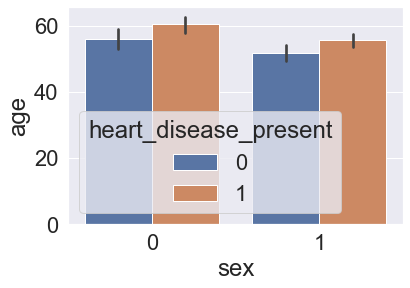

In [187]:
sns.barplot(x=df['sex'],y=df['age'],hue=df['heart_disease_present'])

Inference : The given Seaborn barplot visualizes the relationship between age and the presence of heart disease, grouped by sex. The bars represent the average age within each category, and the color distinction indicates whether heart disease is present or not.

<Figure size 1440x1440 with 0 Axes>

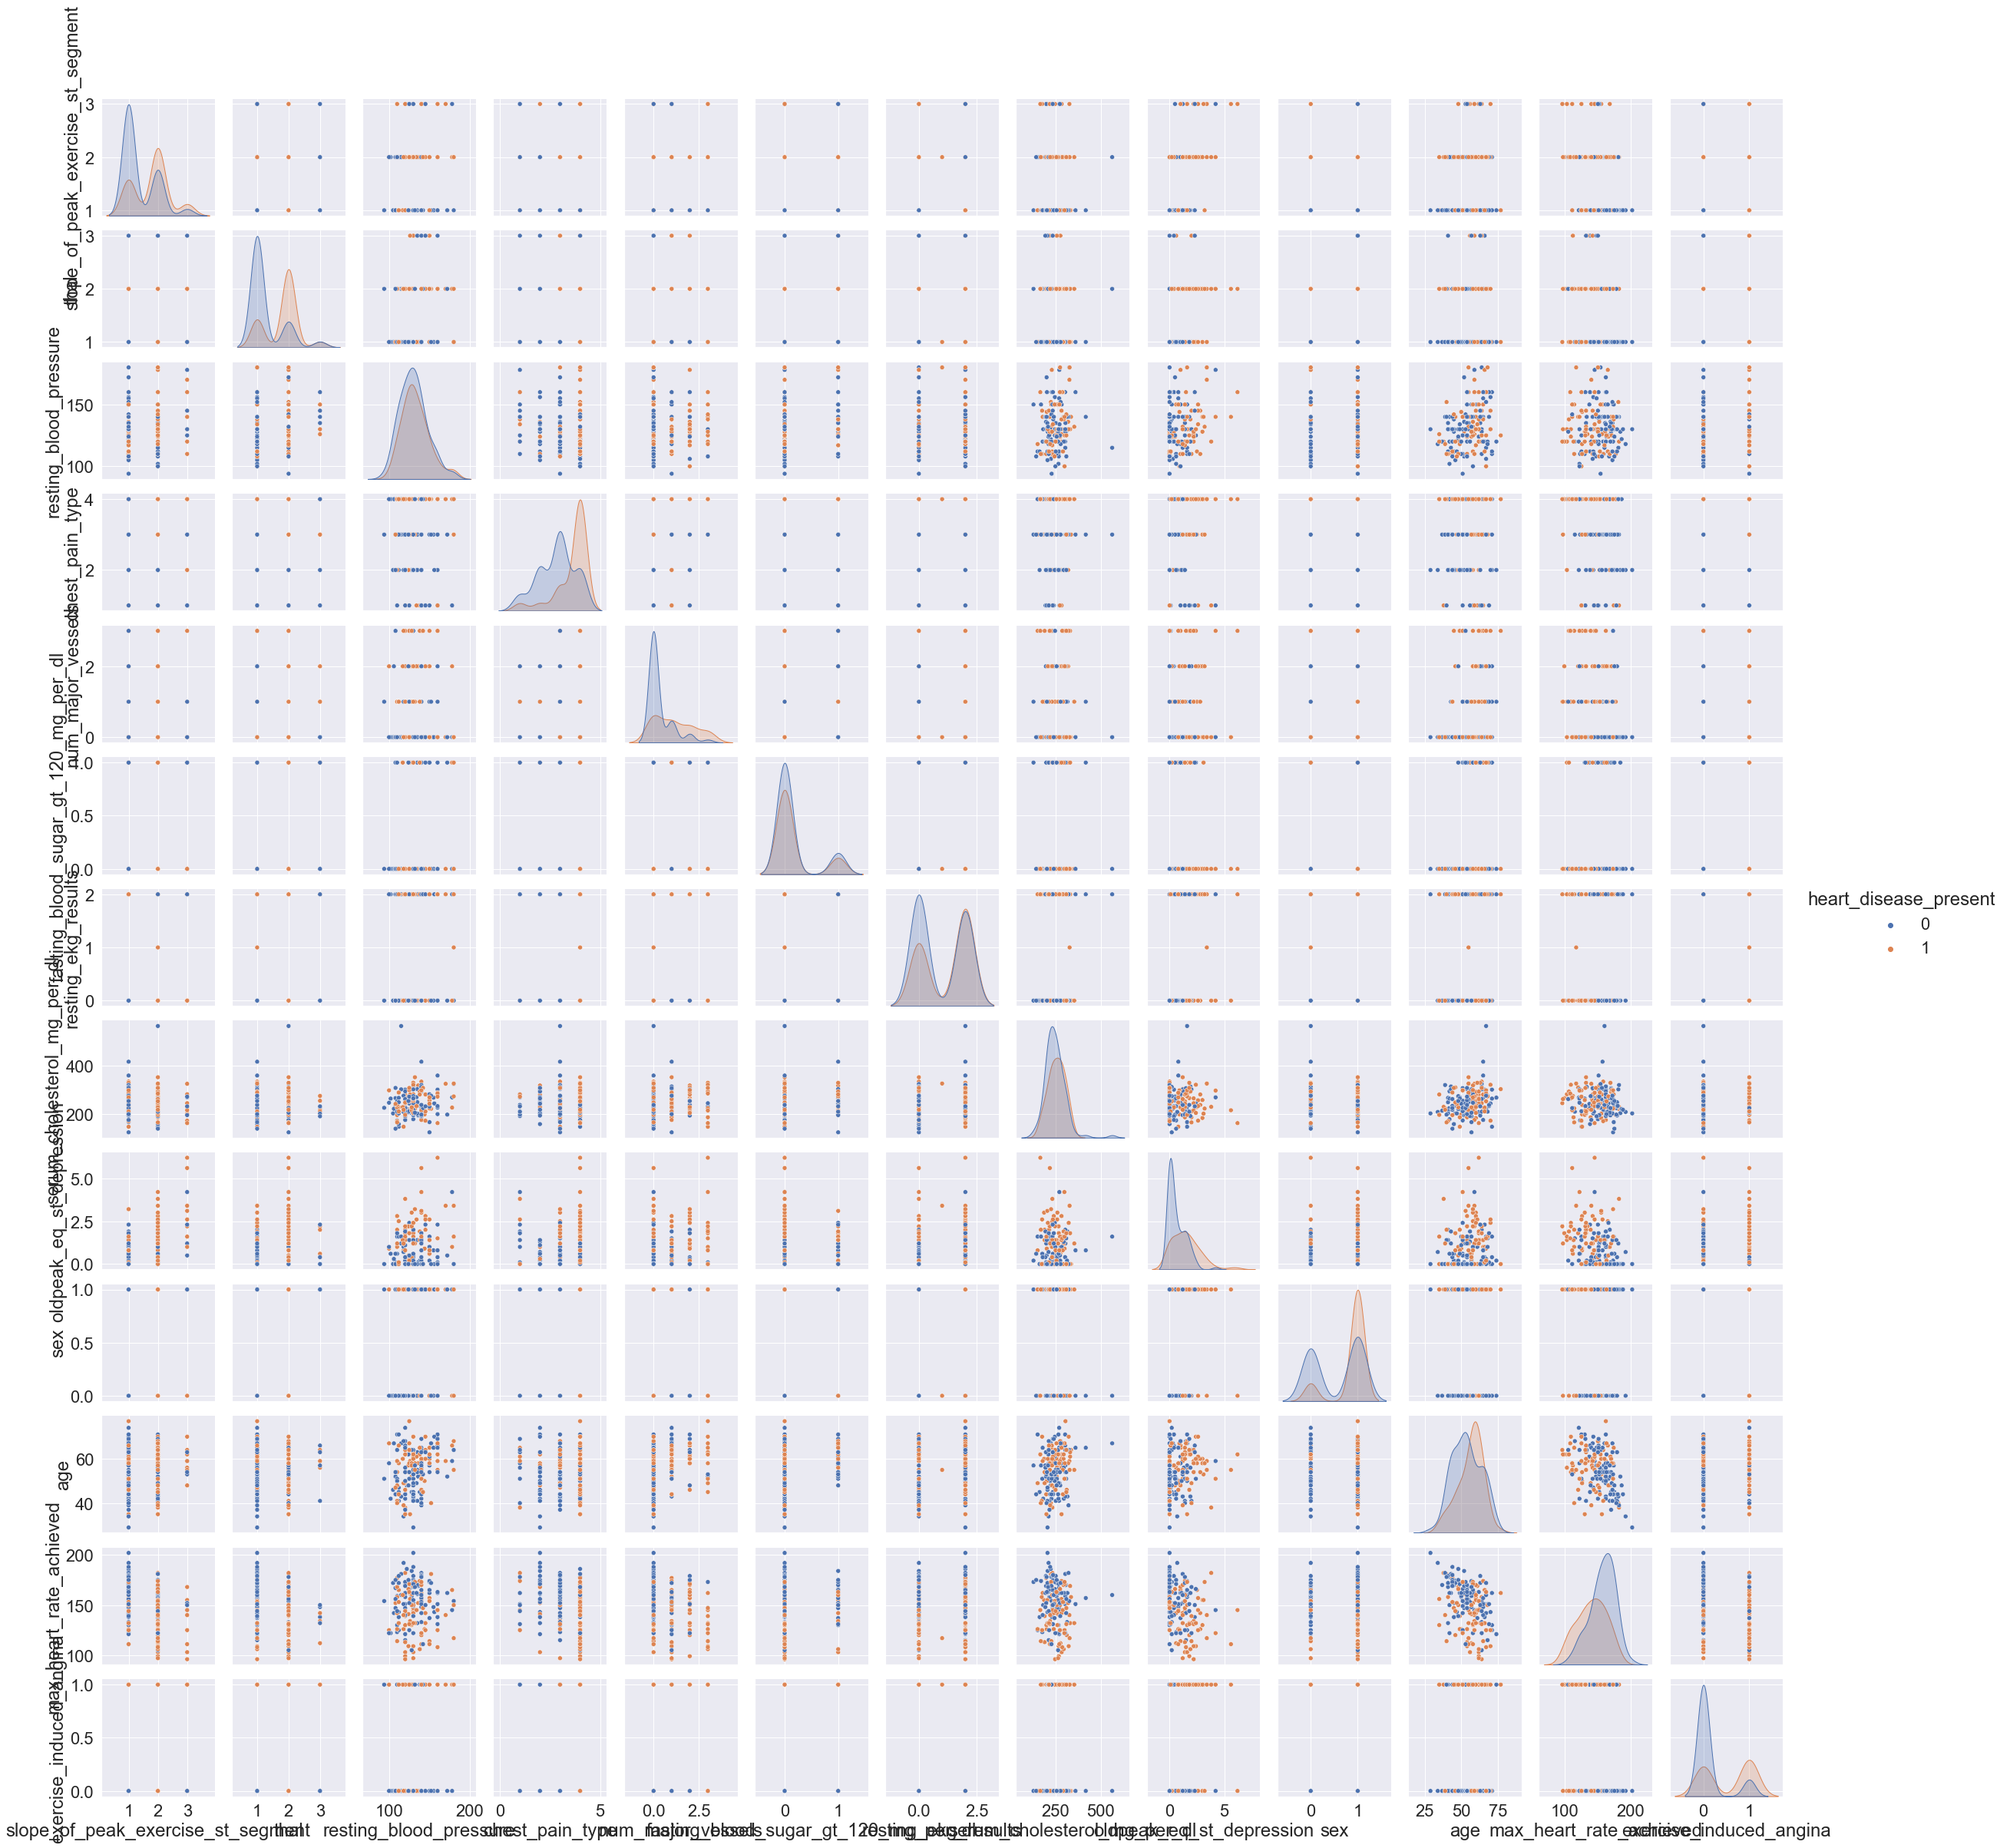

In [188]:
plt.figure(figsize=(20,20))
sns.pairplot(df,hue='heart_disease_present')

This is creating a pair plot of a DataFrame df using Python’s seaborn library. A pair plot is a matrix of scatterplots, where each feature in the DataFrame is compared with the other features. The hue parameter is set to ‘heart_disease_present’, which means that the data points will be colored based on the ‘heart_disease_present’ column of the DataFrame. The plt.figure(figsize=(20,20)) line sets the size of the figure to 20x20. 

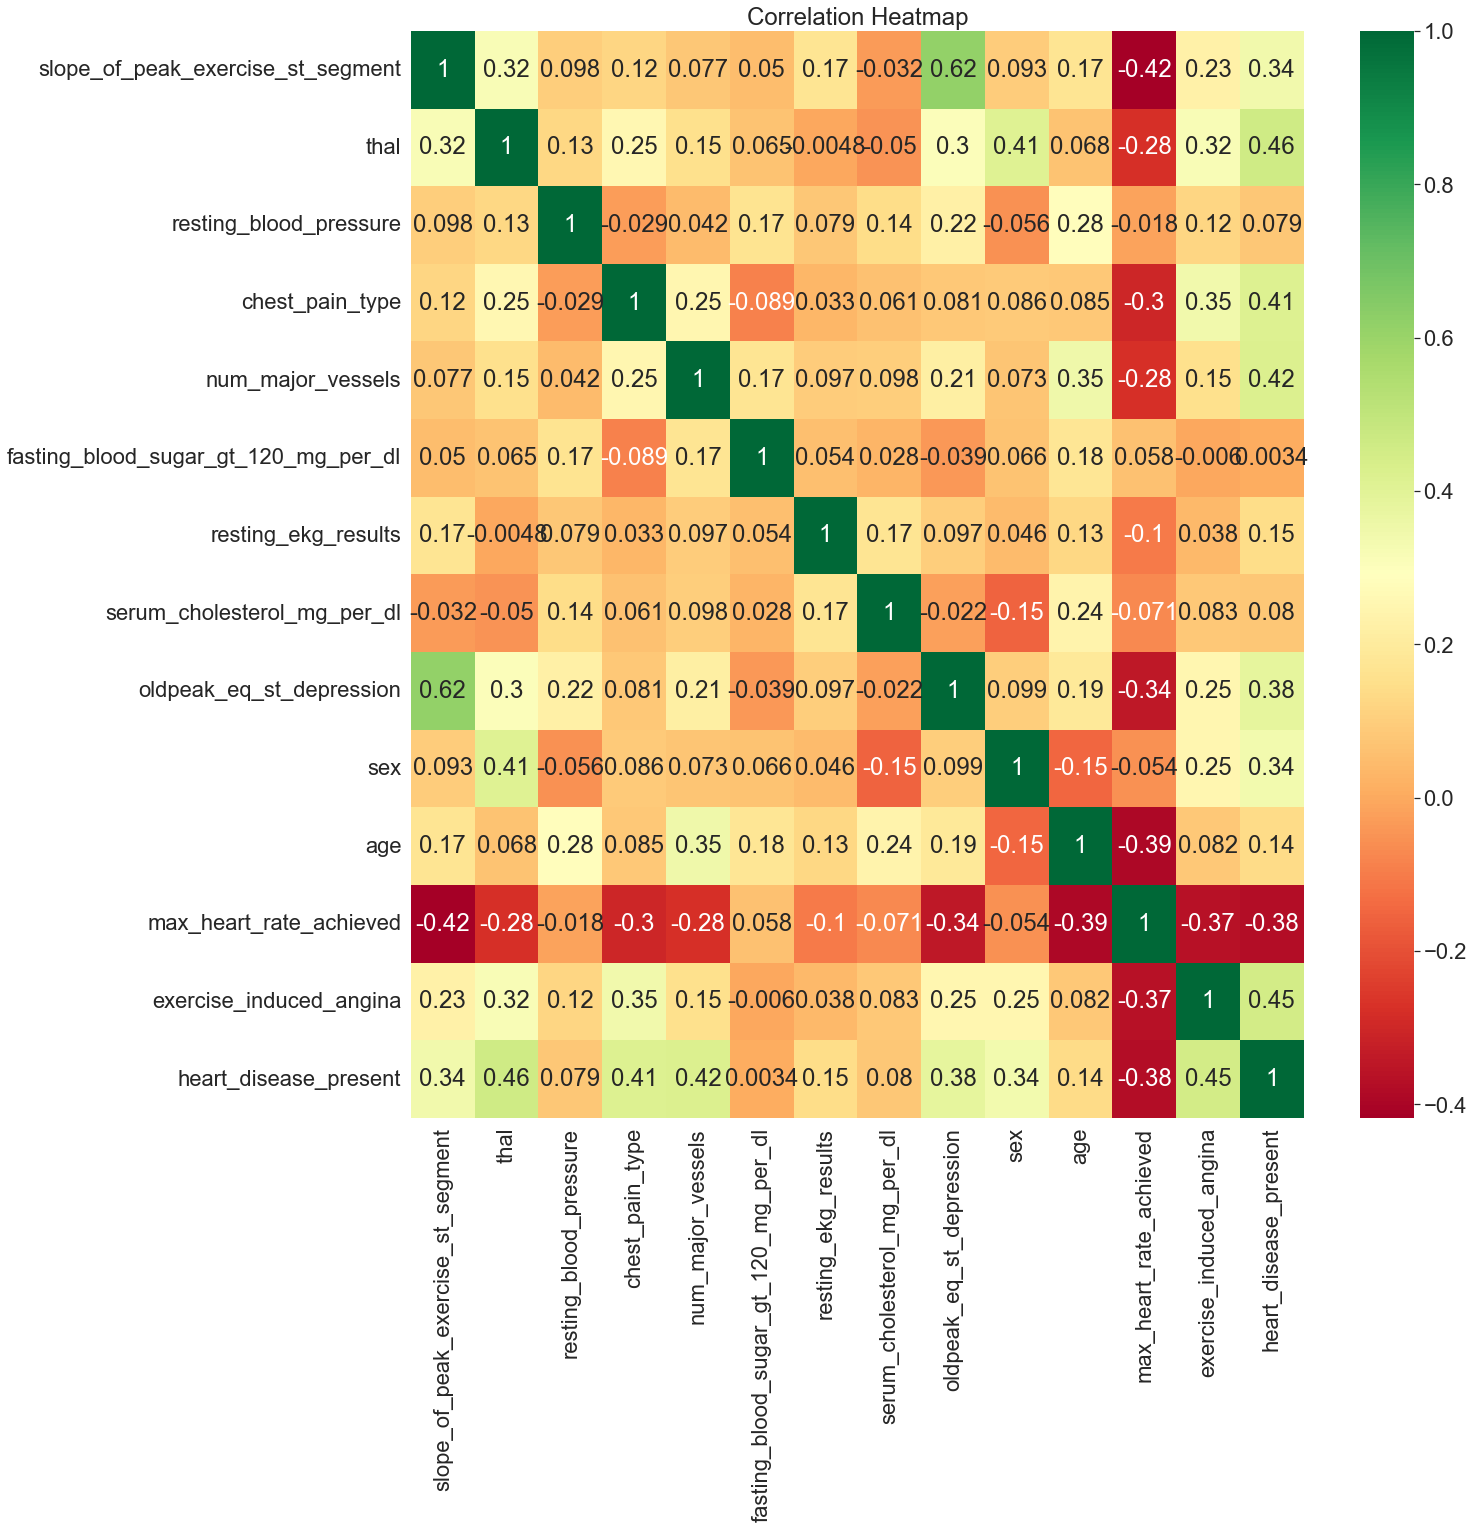

In [189]:
# create a correlation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.show()

Inference : The provided code generates a correlation heatmap using the Seaborn library. This heatmap visualizes the pairwise correlations between the features in the dataframe df. The annotations on the heatmap provide the exact correlation values, and the color spectrum from red to green indicates the strength and direction of the correlations.

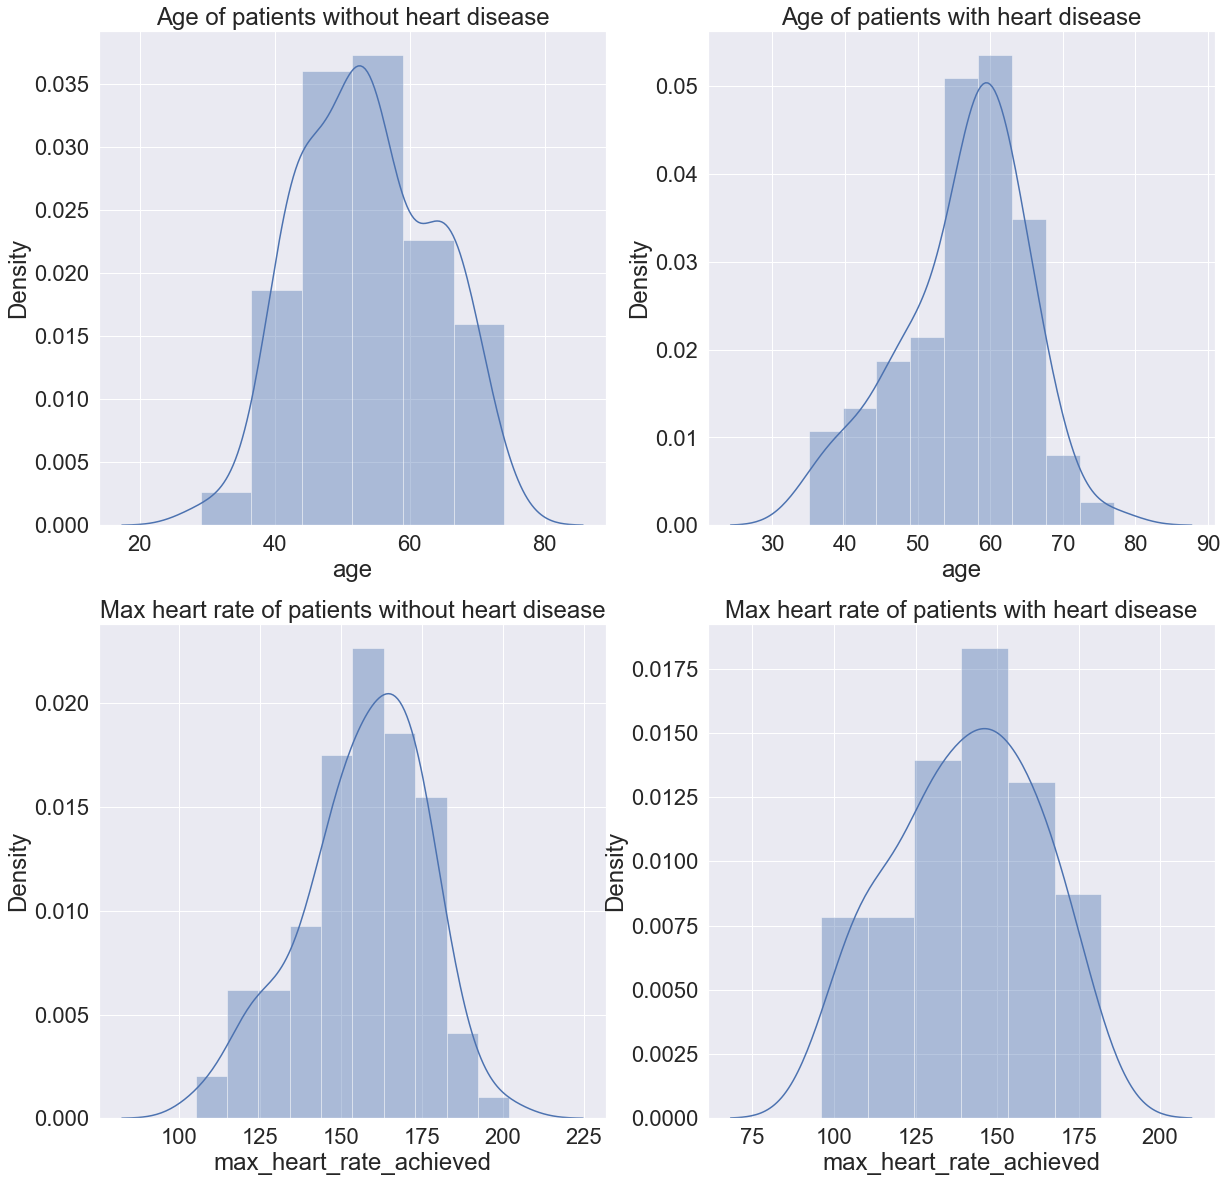

In [190]:
# create four distplots
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.distplot(df[df['heart_disease_present']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['heart_disease_present']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(df[df['heart_disease_present']==0].max_heart_rate_achieved )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(df[df['heart_disease_present']==1].max_heart_rate_achieved )
plt.title('Max heart rate of patients with heart disease')
plt.show()

Inference : The set of four distribution plots provides insights into the age and maximum heart rate achieved for patients with and without heart disease. Here are the key observations:

1.Patients with heart disease tend to be older on average compared to those without heart disease.

2.The maximum heart rate achieved distribution is lower for patients with heart disease, suggesting a potential correlation between heart health and heart rate.

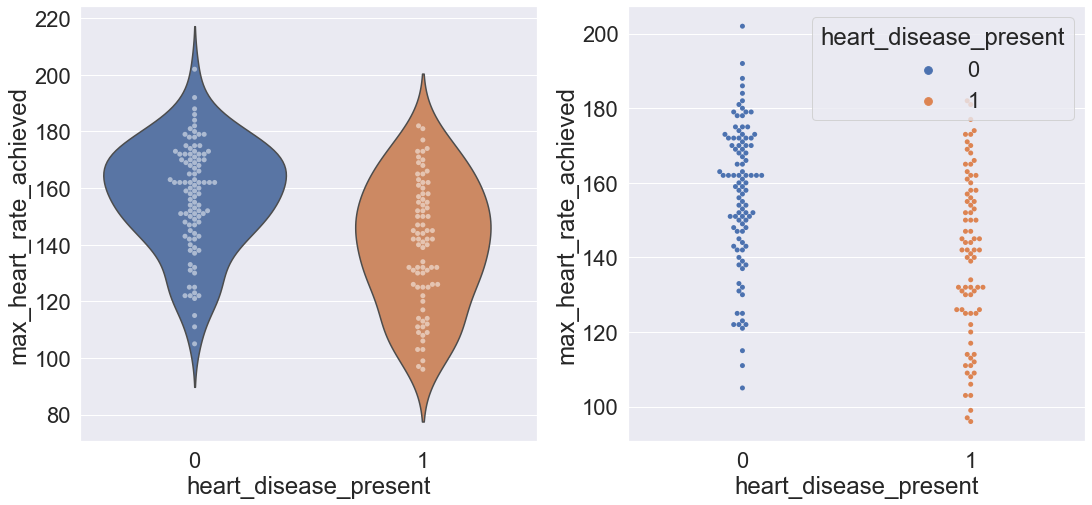

In [191]:
plt.figure(figsize=(18,8))
plt.subplot(121)
sns.violinplot(x="heart_disease_present", y="max_heart_rate_achieved", data=df, inner=None)
sns.swarmplot(x="heart_disease_present", y="max_heart_rate_achieved",data=df, color='w', alpha=0.5)


plt.subplot(122)
sns.swarmplot(x="heart_disease_present", y="max_heart_rate_achieved",hue='heart_disease_present',data=df)
plt.show()



Inference : The pair of plots provides insights into the relationship between maximum heart rate achieved and the presence of heart disease. The left violin plot shows the distribution of heart rates for each disease category, while the right swarm plot displays individual data points. Notably, individuals with heart disease tend to have lower maximum heart rates compared to those without heart disease.

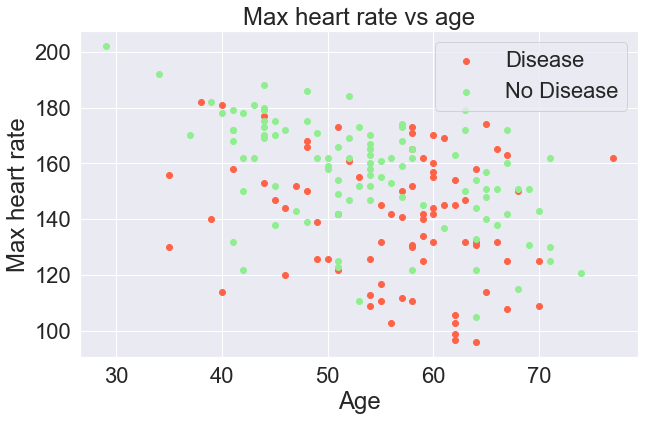

In [192]:
plt.figure(figsize = (10, 6))
plt.scatter(df.age[df.heart_disease_present == 1],
           df.max_heart_rate_achieved[df.heart_disease_present == 1],
           c = 'tomato')
plt.scatter(df.age[df.heart_disease_present == 0],
           df.max_heart_rate_achieved[df.heart_disease_present == 0],
           c = 'lightgreen')
plt.title("Max heart rate vs age")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease", "No Disease"])

In [193]:
X = df.drop('heart_disease_present',axis=1)
y = df['heart_disease_present']

In [194]:
X

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,125,4,2,1,0,254,0.2,1,67,163,0
176,2,1,180,4,0,0,1,327,3.4,0,55,117,1
177,2,2,125,3,0,0,0,309,1.8,1,64,131,1
178,1,1,124,3,2,1,0,255,0.0,1,48,175,0


In [195]:
y

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

In [196]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [197]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)


In [198]:
X_test

array([[-0.89124111,  0.8588975 , -1.37422257, -1.23477477, -0.71840267,
        -0.4382385 , -1.05425489,  1.13729087, -0.90320689,  0.67202151,
        -0.08713407,  0.29618331, -0.68074565],
       [-0.89124111,  0.8588975 ,  0.51222214,  0.90233541,  0.31609717,
        -0.4382385 , -1.05425489, -1.3735836 , -0.90320689,  0.67202151,
         0.44999378,  0.56888406,  1.46897745],
       [ 0.72919727, -0.8588975 ,  0.21746515, -1.23477477, -0.71840267,
        -0.4382385 ,  0.95384966,  0.01500607,  0.34876306, -1.48804762,
         0.0202915 ,  0.52343393, -0.68074565],
       [ 2.34963566, -0.8588975 , -0.37204882, -0.16621968,  0.31609717,
        -0.4382385 ,  0.95384966,  0.45250692, -0.45607477,  0.67202151,
        -0.08713407,  0.11438281, -0.68074565],
       [ 0.72919727, -0.8588975 ,  0.39431935, -2.30332986,  0.31609717,
         2.28186252,  0.95384966,  0.62370291,  0.34876306,  0.67202151,
         1.09454721,  1.11428555, -0.68074565],
       [-0.89124111,  0.858897

In [199]:
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (126, 13)
train_set_y shape: (126,)
test_set_x shape: (54, 13)
test_set_y shape: (54,)


# Model Building

## 1. Logistic Regression 

In [200]:
lr=LogisticRegression()
lr.fit(X_train,y_train )
# y_pred--> our prediction variable for logistic regression
lr_predict=lr.predict(X_test)
lr_predict

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [201]:
accu_train1=lr.score(X_train,y_train)
accu_test1=lr.score(X_test,y_test)

In [202]:
print("Accuracy for Traing dataset : ",accu_train1) # Accuracy for training dataset
print("Accuracy for Test dataset : ",accu_test1) # Accuracy for test dataset

Accuracy for Traing dataset :  0.8412698412698413
Accuracy for Test dataset :  0.8148148148148148


In [203]:
lr_f1 = f1_score(y_test, lr_predict)
print("Logistic Regression f1_score : {}".format(lr_f1))
print("......................................")

lr_acc = accuracy_score(y_test, lr_predict)
print("Logistic Regression accuracy_score : {}".format(lr_acc))
print("...........................................")

lr_recall = recall_score(y_test, lr_predict)
print("Logistic Regression recall_score : {}".format(lr_recall))
print("..........................................")

lr_pre = precision_score(y_test, lr_predict)
print("Logistic Regression precision_score : {}".format(lr_pre))

Logistic Regression f1_score : 0.782608695652174
......................................
Logistic Regression accuracy_score : 0.8148148148148148
...........................................
Logistic Regression recall_score : 0.782608695652174
..........................................
Logistic Regression precision_score : 0.782608695652174


In [204]:
class_report=classification_report(y_test,lr_predict)
print(class_report)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        31
           1       0.78      0.78      0.78        23

    accuracy                           0.81        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.81      0.81      0.81        54



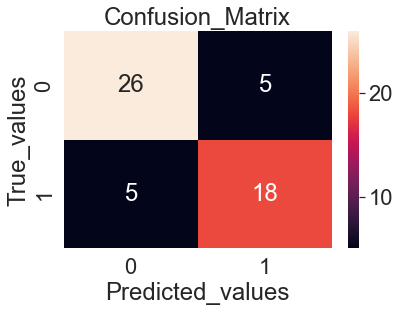

In [205]:
conf = cm(y_test, lr_predict)
sns.heatmap(conf,annot=True)
plt.title("Confusion_Matrix")
plt.xlabel("Predicted_values")
plt.ylabel("True_values")
plt.show()

- The Accuracy Score for Logistic Regression is 81%.

## 2. Random Forest Classifier 

In [206]:
# importing randomforest regression
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
# y_pred--> our prediction variable for randomforest regression
rf_predict=rf.predict(X_test)
rf_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

In [207]:
accu_train2=rf.score(X_train,y_train)*100
accu_test2=rf.score(X_test,y_test)*100

In [208]:
print("Accuracy for Traing dataset : ",accu_train2) # Accuracy for training dataset
print("Accuracy for Test dataset : ",accu_test2) # Accuracy for test dataset

Accuracy for Traing dataset :  100.0
Accuracy for Test dataset :  83.33333333333334


In [209]:
rf_f1 = f1_score(y_test, rf_predict)
print("Random Forest Classification f1_score : {}".format(rf_f1))
print("......................................")

rf_acc = accuracy_score(y_test, rf_predict)
print("Random Forest Classification accuracy_score : {}".format(rf_acc))
print("...........................................")

rf_recall = recall_score(y_test, rf_predict)
print("Random Forest Classification recall_score : {}".format(rf_recall))
print("..........................................")

rf_pre = precision_score(y_test, rf_predict)
print("Random Forest Classification precision_score : {}".format(rf_pre))

Random Forest Classification f1_score : 0.8
......................................
Random Forest Classification accuracy_score : 0.8333333333333334
...........................................
Random Forest Classification recall_score : 0.782608695652174
..........................................
Random Forest Classification precision_score : 0.8181818181818182


In [210]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86        31
           1       0.82      0.78      0.80        23

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54



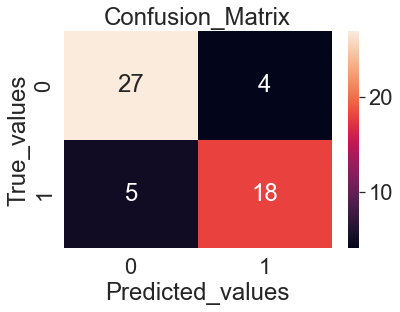

In [211]:
conf = cm(y_test, rf_predict)
sns.heatmap(conf,annot=True)
plt.title("Confusion_Matrix")
plt.xlabel("Predicted_values")
plt.ylabel("True_values")
plt.show()

- The Accuracy Score for Random Forest Regression is 85%.

## 3. Decision Tree Classifier 

In [212]:
# importing decisiontree regression
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
# y_pred--> our prediction variable for decisiontree regression
dt_predict=dt.predict(X_test)
dt_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [213]:
accu_train3=dt.score(X_train,y_train)*100
accu_test3=dt.score(X_test,y_test)*100

In [214]:
print("Accuracy for Traing dataset : ",accu_train3) # Accuracy for training dataset
print("Accuracy for Test dataset : ",accu_test3) # Accuracy for test dataset

Accuracy for Traing dataset :  100.0
Accuracy for Test dataset :  74.07407407407408


In [215]:
dt_f1 = f1_score(y_test, dt_predict)
print("Decision Tree Classifier f1_score : {}".format(dt_f1))
print("......................................")

dt_acc = accuracy_score(y_test, dt_predict)
print("Decision Tree Classifier accuracy_score : {}".format(dt_acc))
print("...........................................")

dt_recall = recall_score(y_test, dt_predict)
print("Decision Tree Classifier recall_score : {}".format(dt_recall))
print("..........................................")

dt_pre = precision_score(y_test, dt_predict)
print("Decision Tree Classifier precision_score : {}".format(dt_pre))

Decision Tree Classifier f1_score : 0.6818181818181819
......................................
Decision Tree Classifier accuracy_score : 0.7407407407407407
...........................................
Decision Tree Classifier recall_score : 0.6521739130434783
..........................................
Decision Tree Classifier precision_score : 0.7142857142857143


In [216]:
print(classification_report(y_test,dt_predict))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78        31
           1       0.71      0.65      0.68        23

    accuracy                           0.74        54
   macro avg       0.74      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



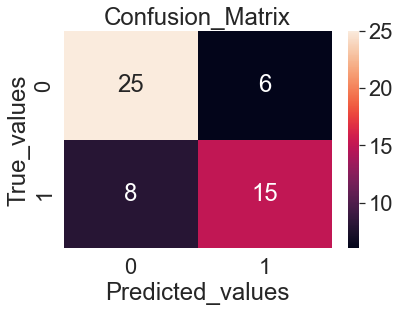

In [217]:
conf = cm(y_test, dt_predict)
sns.heatmap(conf,annot=True)
plt.title("Confusion_Matrix")
plt.xlabel("Predicted_values")
plt.ylabel("True_values")
plt.show()

- The Accuracy Score for Decision Tree Regression is 76%.

## 4. Support Vector Machine(SVM) 

In [218]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
# y_pred--> our prediction variable for svm regression
svm_predict=svm.predict(X_test)
svm_predict

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

In [219]:
accu_train4=svm.score(X_train,y_train)*100
accu_test4=svm.score(X_test,y_test)*100

In [220]:
print("Accuracy for Traing dataset : ",accu_train4) # Accuracy for training dataset
print("Accuracy for Test dataset : ",accu_test4) # Accuracy for test dataset

Accuracy for Traing dataset :  91.26984126984127
Accuracy for Test dataset :  83.33333333333334


In [221]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm,X,y,cv=5,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good.

[0.71428571 0.90909091 0.89655172 0.70588235 0.75      ]
Cross validation Score: 0.7951621400911462
Std : 0.08923128117560468


In [222]:
svm_f1 = f1_score(y_test, svm_predict)
print("Support Vector Machine f1_score : {}".format(svm_f1))
print("......................................")

svm_acc = accuracy_score(y_test, svm_predict)
print("Support Vector Machine accuracy_score : {}".format(svm_acc))
print("...........................................")

svm_recall = recall_score(y_test, svm_predict)
print("Support Vector Machine recall_score : {}".format(svm_recall))
print("..........................................")

svm_pre = precision_score(y_test, svm_predict)
print("Support Vector Machine precision_score : {}".format(svm_pre))

Support Vector Machine f1_score : 0.8
......................................
Support Vector Machine accuracy_score : 0.8333333333333334
...........................................
Support Vector Machine recall_score : 0.782608695652174
..........................................
Support Vector Machine precision_score : 0.8181818181818182


In [223]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86        31
           1       0.82      0.78      0.80        23

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54



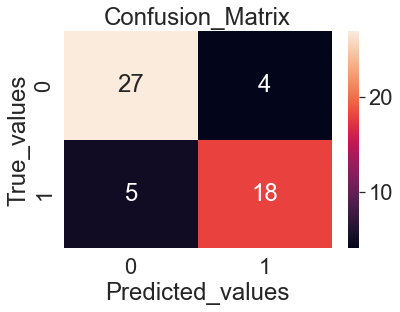

In [224]:
conf = cm(y_test, svm_predict)
sns.heatmap(conf,annot=True)
plt.title("Confusion_Matrix")
plt.xlabel("Predicted_values")
plt.ylabel("True_values")
plt.show()

- The Accuracy Score for Support Vector Machine (SVM) is 83%.

## 5. K- Nearest Neighbour(KNN) Classifier

In [225]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [226]:
k_range=range(1,26)
scores={}
h_score = 0       # to find the best score
best_k=0          # to find the best k
scores_list=[]  

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction_knn=knn.predict(X_test)
    scores[k]=accuracy_score(y_test,prediction_knn)
    if scores[k]>h_score:
        h_score = scores[k]
        best_k = k

    scores_list.append(accuracy_score(y_test,prediction_knn))
print('The best value of k is {} with score : {}'.format(best_k,h_score))

The best value of k is 18 with score : 0.8888888888888888


In [227]:
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=18)

In [228]:
prediction_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100
print('accuracy_score score     : ',accuracy_score(y_test,prediction_knn)*100,'%')

accuracy_score score     :  88.88888888888889 %


In [229]:
knn_predict=knn.predict(X_test)
knn_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [230]:
accu_train5=knn.score(X_train,y_train)*100
accu_test5=knn.score(X_test,y_test)*100
print("Accuracy for Traing dataset : ",accu_train5) # Accuracy for training dataset
print("Accuracy for Test dataset : ",accu_test5) # Accuracy for test dataset

Accuracy for Traing dataset :  78.57142857142857
Accuracy for Test dataset :  88.88888888888889


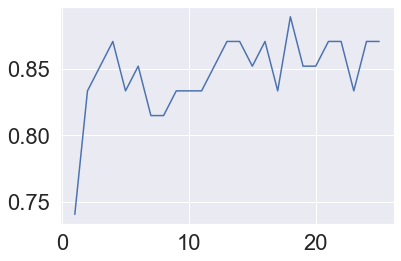

In [231]:
plt.plot(k_range,scores_list)

In [232]:
knn_f1 = f1_score(y_test, knn_predict)
print("K- Nearest Neighbour f1_score : {}".format(knn_f1))
print("......................................")

knn_acc = accuracy_score(y_test, knn_predict)
print("K- Nearest Neighbour accuracy_score : {}".format(knn_acc))
print("...........................................")

knn_recall = recall_score(y_test, knn_predict)
print("K- Nearest Neighbour recall_score : {}".format(knn_recall))
print("..........................................")

knn_pre = precision_score(y_test, knn_predict)
print("K- Nearest Neighbour precision_score : {}".format(knn_pre))

K- Nearest Neighbour f1_score : 0.8571428571428571
......................................
K- Nearest Neighbour accuracy_score : 0.8888888888888888
...........................................
K- Nearest Neighbour recall_score : 0.782608695652174
..........................................
K- Nearest Neighbour precision_score : 0.9473684210526315


In [233]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        31
           1       0.95      0.78      0.86        23

    accuracy                           0.89        54
   macro avg       0.90      0.88      0.88        54
weighted avg       0.90      0.89      0.89        54



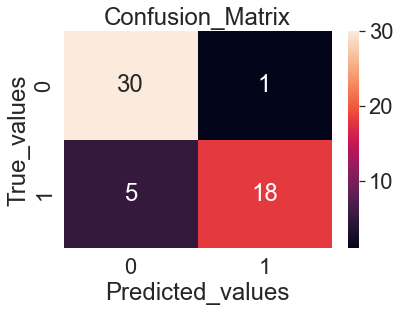

In [234]:
conf = cm(y_test, knn_predict)
sns.heatmap(conf,annot=True)
plt.title("Confusion_Matrix")
plt.xlabel("Predicted_values")
plt.ylabel("True_values")
plt.show()

- The Accuracy Score for K- Nearest Neighbour(KNN) is 89%.

## 6. Gradient Boosting Classifier 

In [235]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_predict=gb.predict(X_test)
gb_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

In [236]:
accu_train6=gb.score(X_train,y_train)*100
accu_test6=gb.score(X_test,y_test)*100
print("Accuracy for Traing dataset : ",accu_train6) # Accuracy for training dataset
print("Accuracy for Test dataset : ",accu_test6) # Accuracy for test dataset

Accuracy for Traing dataset :  100.0
Accuracy for Test dataset :  79.62962962962963


In [237]:
gb_f1 = f1_score(y_test, gb_predict)
print("Gradient Boosting Classifier f1_score : {}".format(gb_f1))
print("......................................")

gb_acc = accuracy_score(y_test, gb_predict)
print("Gradient Boosting Classifier accuracy_score : {}".format(gb_acc))
print("...........................................")

gb_recall = recall_score(y_test, gb_predict)
print("Gradient Boosting Classifier recall_score : {}".format(gb_recall))
print("..........................................")

gb_pre = precision_score(y_test, gb_predict)
print("Gradient Boosting Classifier precision_score : {}".format(gb_pre))

Gradient Boosting Classifier f1_score : 0.7441860465116279
......................................
Gradient Boosting Classifier accuracy_score : 0.7962962962962963
...........................................
Gradient Boosting Classifier recall_score : 0.6956521739130435
..........................................
Gradient Boosting Classifier precision_score : 0.8


In [238]:
print(classification_report(y_test,gb_predict))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        31
           1       0.80      0.70      0.74        23

    accuracy                           0.80        54
   macro avg       0.80      0.78      0.79        54
weighted avg       0.80      0.80      0.79        54



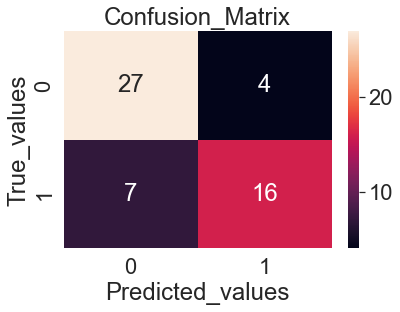

In [239]:
conf = cm(y_test, gb_predict)
sns.heatmap(conf,annot=True)
plt.title("Confusion_Matrix")
plt.xlabel("Predicted_values")
plt.ylabel("True_values")
plt.show()

- The Accuracy Score for Gradient Boosting is 78%

## 7. Hyperparameter Tuning

In [240]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}
             
# Initialize KNN classifier
model=KNeighborsClassifier()
# Initialize GridSearchCV
grid = GridSearchCV(model, param_grid, refit = True, verbose = 2,cv=5, scoring='accuracy')

# Perform GridSearchCV
grid.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=5; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=7; total time=   0.0s
[CV] END ....................metric=euclidean, n

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [3, 5, 7, 9, 11]},
             scoring='accuracy', verbose=2)

In [241]:
# Print best parameters and best score
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5}
Best Score: 0.810153846153846


In [242]:
# Evaluate on test set
best_model = grid.best_estimator_
train_accuracy = best_model.score(X_train, y_train)*100
test_accuracy = best_model.score(X_test, y_test)*100
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 82.53968253968253
Test Accuracy: 88.88888888888889


We use K-Nearest Neighbors Classification because it is much faster than other Classification Algorithm

In [243]:
# Define hyperparameters grids for each algorithm
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty type
    'solver': ['liblinear', 'saga']  # Solver type
}

# Initialize classifiers
rf = RandomForestClassifier(random_state=42)
svm = SVC()
lr = LogisticRegression()

# Create a list of dictionaries for algorithms and their respective parameter grids
models = [
    {'classifier': rf, 'param_grid': param_grid_rf},
    {'classifier': svm, 'param_grid': param_grid_svm},
    {'classifier': lr, 'param_grid': param_grid_lr}
]

# Perform GridSearchCV for each algorithm
for model in models:
    grid_search = GridSearchCV(model['classifier'], model['param_grid'], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Print best parameters and best score for each algorithm
    print("Best Parameters for", model['classifier'].__class__.__name__, ":", grid_search.best_params_)
    print("Best Score for", model['classifier'].__class__.__name__, ":", grid_search.best_score_)

    # Evaluate on test set
    best_model = grid_search.best_estimator_
    test_accuracy = best_model.score(X_test, y_test)*100
    print("Test Accuracy for", model['classifier'].__class__.__name__, ":", test_accuracy,"\n")
    print("*****************************************************************")

Best Parameters for RandomForestClassifier : {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Score for RandomForestClassifier : 0.7938461538461539
Test Accuracy for RandomForestClassifier : 87.03703703703704 

*****************************************************************
Best Parameters for SVC : {'C': 0.1, 'kernel': 'linear'}
Best Score for SVC : 0.8181538461538462
Test Accuracy for SVC : 83.33333333333334 

*****************************************************************
Best Parameters for LogisticRegression : {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score for LogisticRegression : 0.8098461538461539
Test Accuracy for LogisticRegression : 85.18518518518519 

*****************************************************************


# Comparing all the Models 

In [252]:
# Comparing all the models
models ={
    'Model': [ 'K-Nearest Neighbors Classifier','Random Forest Classifier','Logistic Regression','Support Vector Machine (SVM)','Decision Tree Classifier','Gradient Boosting Classifier'],
    'F1 Score': [0.8571428571428571, 0.8181818181818182, 0.782608695652174 , 0.8000000000000, 0.6818181818181819,0.7441860465116279]}

models = pd.DataFrame(models) 
models = models.sort_values(by='F1 Score', ascending=False)
models

,Model,F1 Score
0,K-Nearest Neighbors Classifier,0.857143
1,Random Forest Classifier,0.818182
3,Support Vector Machine (SVM),0.800000
2,Logistic Regression,0.782609
5,Gradient Boosting Classifier,0.744186
4,Decision Tree Classifier,0.681818


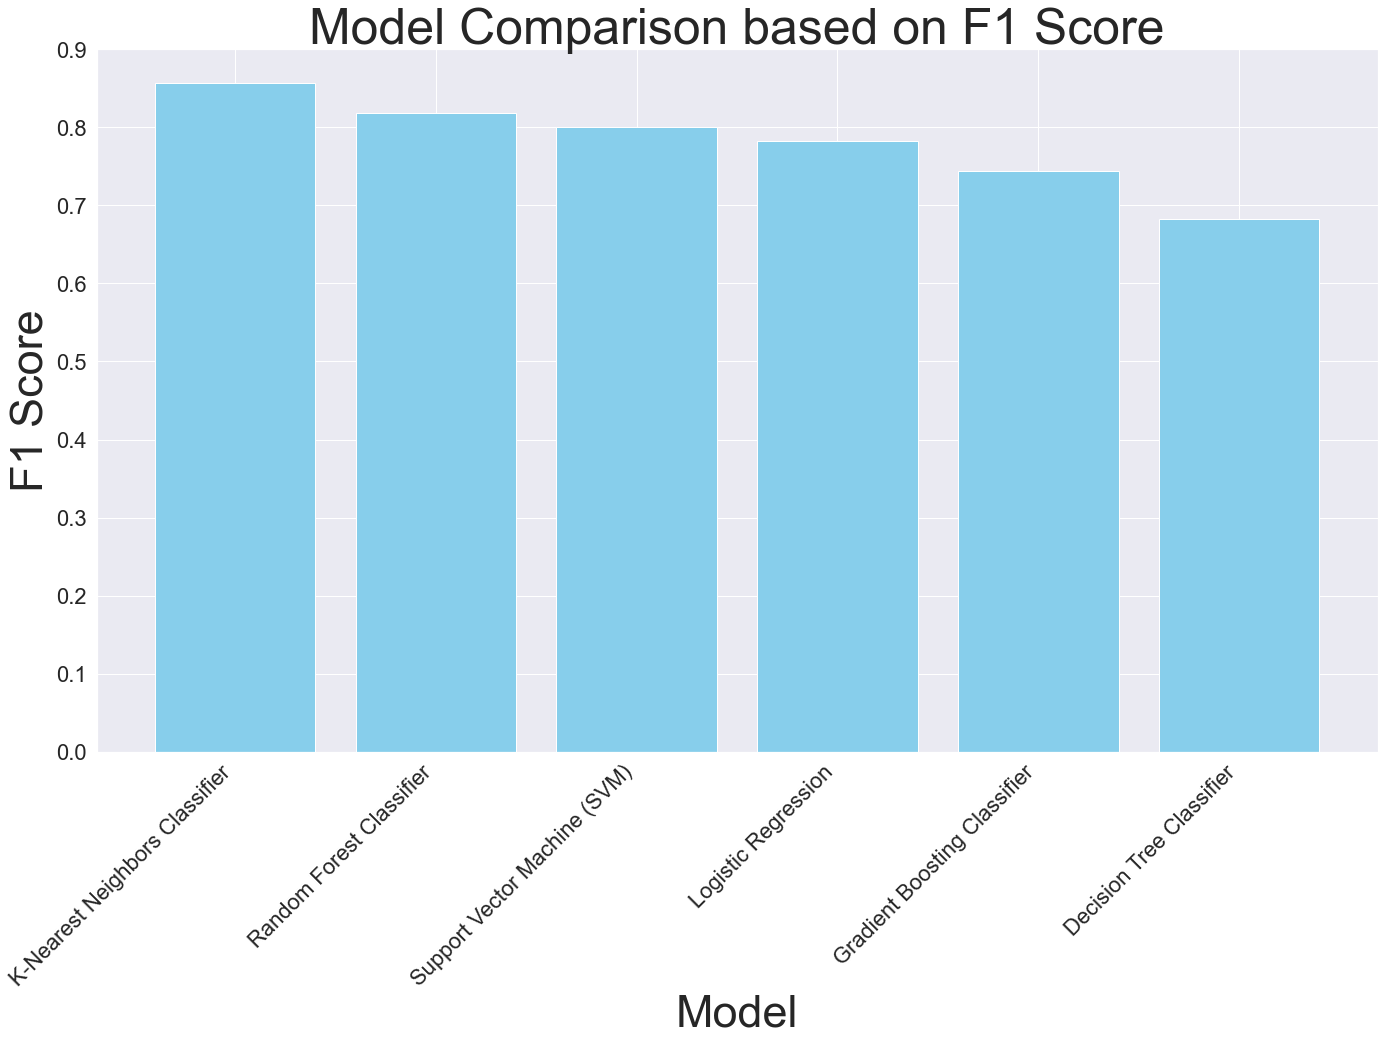

In [253]:
# Plot
plt.figure(figsize=(20, 15))
plt.bar(models['Model'], models['F1 Score'], color='skyblue')
plt.title('Model Comparison based on F1 Score',fontsize=50)
plt.xlabel('Model',fontsize=45)
plt.ylabel('F1 Score',fontsize=45)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Based on the performance of all models **K-Nearest Neighbors Classifier** performs well With the highest F1 score of **88.888**, KNN offers excellent overall performance across all metrics, including accuracy, recall, and precision. 

# Conclusion 

The conclusion for the heart disease prediction project can be summarized as follows:

- Predictive Analysis: The project successfully implemented machine learning algorithms to predict heart disease presence based on patient data.

- Model Performance: Among the models tested, Random Forest Classifier showed the highest accuracy on the test dataset.

- Data Insights: Exploratory Data Analysis (EDA) and visualizations provided valuable insights into the factors influencing heart disease.

This project demonstrates the potential of machine learning in healthcare, particularly in predicting and preventing heart-related illnesses. It emphasizes the importance of accurate models and the need for continuous research and development in this field.